<h3>ML4DS Lab: week 1: Simple linear regression lab</h3>

#### Aims

* Do a simple linear regression on the Olympic 100~m data in Python
* Practise numpy, matplotlib, and sklearn


#### Tasks
* Download the data (‘olympic100m.txt’) from the Moodle page
* Plot Olympic year against winning time
* Plot the loss function in 1D and 2D
* Fit a model with sklearn functions
* Fit a model with using provided expressions to compute $w_0$ and $w_1$.
* Create a new plot that includes the data and the function defined by $w_0$ and $w_1$
* Make a prediction at 2012

#### Task 1: Download and import the olympic data

Reference to `loadtxt` https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

In [1]:
import numpy as np
fname = 'olympic100m.txt'
np.loadtxt(fname, delimiter=',')

array([[1896.  ,   12.  ],
       [1900.  ,   11.  ],
       [1904.  ,   11.  ],
       [1906.  ,   11.2 ],
       [1908.  ,   10.8 ],
       [1912.  ,   10.8 ],
       [1920.  ,   10.8 ],
       [1924.  ,   10.6 ],
       [1928.  ,   10.8 ],
       [1932.  ,   10.3 ],
       [1936.  ,   10.3 ],
       [1948.  ,   10.3 ],
       [1952.  ,   10.4 ],
       [1956.  ,   10.5 ],
       [1960.  ,   10.2 ],
       [1964.  ,   10.  ],
       [1968.  ,    9.95],
       [1972.  ,   10.14],
       [1976.  ,   10.06],
       [1980.  ,   10.25],
       [1984.  ,    9.99],
       [1988.  ,    9.92],
       [1992.  ,    9.96],
       [1996.  ,    9.84],
       [2000.  ,    9.87],
       [2004.  ,    9.85],
       [2008.  ,    9.69]])

#### Task 2: Plot the data
Reference to `scatter`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

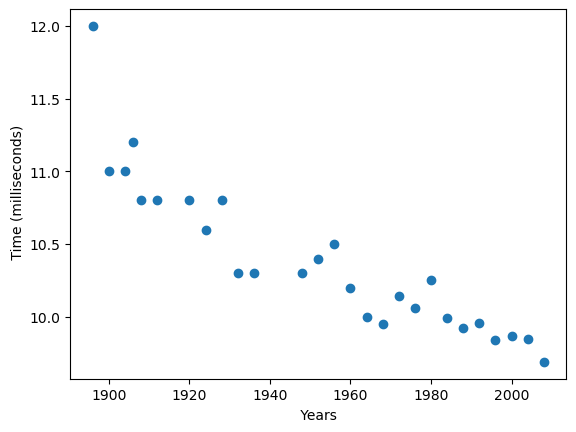

In [2]:
%matplotlib inline
import pylab as plt
x, t = np.loadtxt(fname, delimiter=',', usecols=(0, 1), unpack=True)
plt.scatter(x, t)
plt.xlabel(" Years ")
plt.ylabel(" Time (milliseconds)")
plt.show()

#### Task 3. Fit a straightline using `LinearRegression` in `sklean`. Plot the model with the data and prediction at 2012.
Reference to `LinearRegression`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [3]:
from sklearn.linear_model import LinearRegression # import

x = np.loadtxt(fname, delimiter=',', usecols=0, unpack=True)
x = x.reshape(-1,1)
t = np.loadtxt(fname, delimiter=',', usecols=1, unpack=True)
t = t.reshape(-1,1)
reg=LinearRegression().fit(x, t)
w0 = reg.intercept_
w1 = reg.coef_
print (w0, w1) # print w0, w1

[36.4164559] [[-0.01333089]]


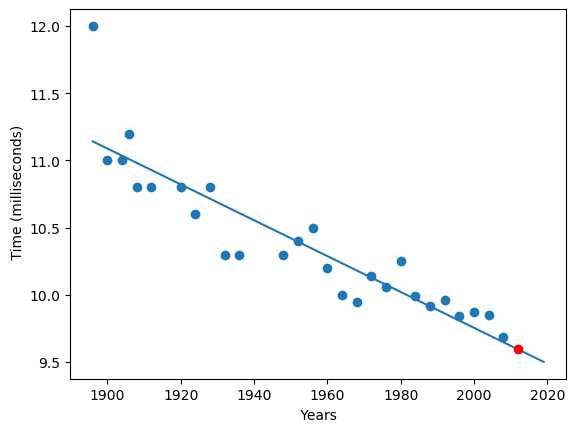

In [4]:
x = np.array([i for i in range(1896,2020)]).reshape(-1,1) # generate new x to plot the fitted line. Note better not to use the original x !
y = w1 * x + w0

plt.plot(x,y)# plot the fitted model


y_pred = reg.predict(np.array([[2012]]))# plot the prediction at 2012
plt.plot ([2012],y_pred, 'ro')# draw a scatter plot
x, t = np.loadtxt(fname, delimiter=',', usecols=(0, 1), unpack=True)
plt.scatter(x, t)
plt.xlabel(" Years ")
plt.ylabel(" Time (milliseconds)")
plt.show()# always label x&y-axis

#### Task 5: Fit the model with the Least Square solution. Plot the model with the data and prediction at 2012.

Let's fit a model with an analytical solution to the problem of finding the parameters with the minimum average loss.

Recall that the average loss is $$  L(w_0, w_1) = \frac{1}{N}\sum_{n=1}^N (t_n - w_0 - w_1x_n)^2 $$
$L$ is a function of $w_0$ and $w_1$. All $x_n$ and $t_n$ are given.  

The procedure to find the analytical expression of the optimal parameters is the following:

- Solving $$\frac{\partial L(w_0, w_1)}{\partial w_0} = 0, \quad \frac{\partial L(w_0, w_1)}{\partial w_1} = 0 $$
- the average loss is minimised:
$$ w_1 = \frac{\bar{x}\bar{t} - \bar{xt}}{\bar{x}\bar{x} - \bar{x^2}} $$
and
$$ w_0 = \bar{t} - w_1\bar{x} $$
where $\bar{z} = \frac{1}{N}\sum_{n=1}^N z_n$.

You are encouraged to derive these yourself

In [5]:
xbar = sum(x) / len(x)
tbar = sum(t) / len(x)
xxbar = sum(x_i ** 2 for x_i in x) / len(x)
xtbar = sum(x_i * t_i for x_i, t_i in zip(x, t)) / len(x)
print(xbar)
print(tbar)
print(xxbar)
print(xtbar)

1952.3703703703704
10.38962962962963
3812975.5555555555
20268.06814814815


In [6]:
w1 = (xbar * tbar - xtbar) / (xbar * xbar - xxbar)
w0 = tbar - w1 * xbar
print(w0)
print(w1)

36.41645590249706
-0.013330885710957634
